In [61]:
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import os
import collections
import matplotlib as mp

# Read simulation files
def datafileread(measurename,skipfirstrows):
    # Reading Datafiles
    path = measurename
    data = np.genfromtxt(path,
                        skip_header=skipfirstrows,
                        delimiter=' ',
                        dtype=(float,float),
                        unpack=True)
    return data

# measurement
ref_time, ref_vbatt, ref_vclamp9, ref_v1p0, ref_v2p5 = datafileread('simu_ref.csv',1)
block1_time, block1_vbatt, block1_vclamp9 = datafileread('simu_block1.csv',1)
block2_time, block2_vclamp9, block2_v1p0 = datafileread('simu_block2.csv',1)
block3_time, block3_v1p0, block3_v2p5 = datafileread('simu_block3.csv',1)

ref_time *= 1e6
block1_time *= 1e6
block2_time *= 1e6
block3_time *= 1e6


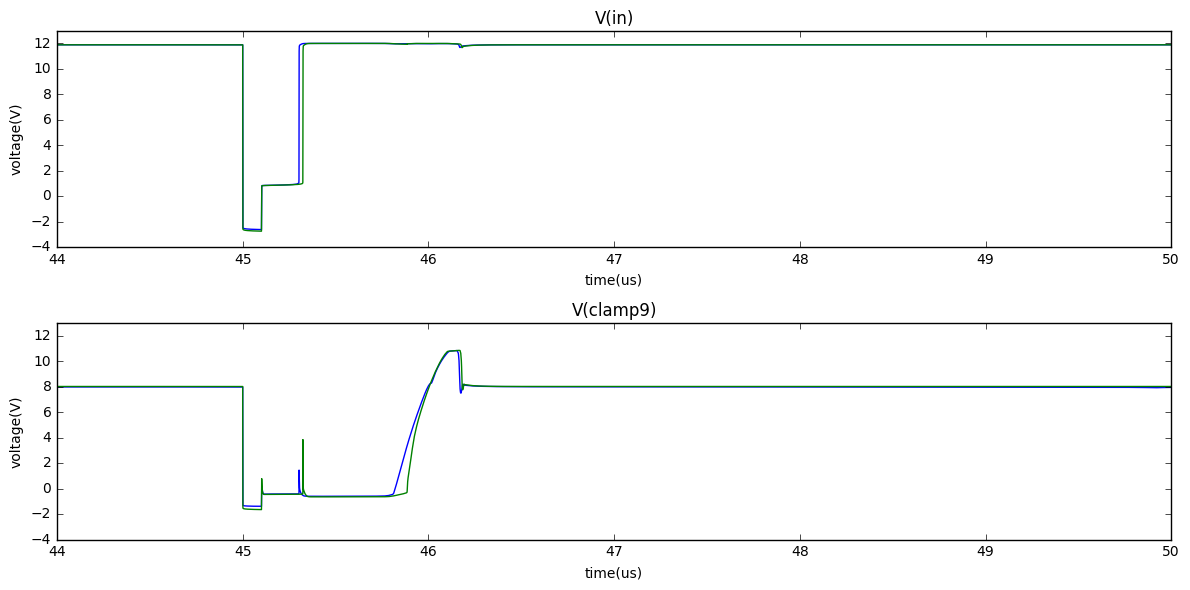

In [62]:
f, (ax1, ax2) = plt.subplots(2,1,figsize=(12,6))
#
ax1.plot(ref_time,ref_vbatt)
ax1.plot(block1_time,block1_vbatt)
ax1.set_title('V(in)')
ax1.set_xlim([44, 50])
ax1.set_ylim([-4, 13])
ax1.set_xlabel('time(us)')
ax1.set_ylabel('voltage(V)')
#c
ax2.plot(ref_time,ref_vclamp9)
ax2.plot(block1_time,block1_vclamp9)
ax2.set_xlim([44, 50])
ax2.set_ylim([-4, 13])
ax2.set_title('V(clamp9)')
ax2.set_xlabel('time(us)')
ax2.set_ylabel('voltage(V)')

#
plt.tight_layout()
plt.savefig("../../src/4/figures/simulation_comparison_block1.png", pad_inches=0.3)
plt.show()

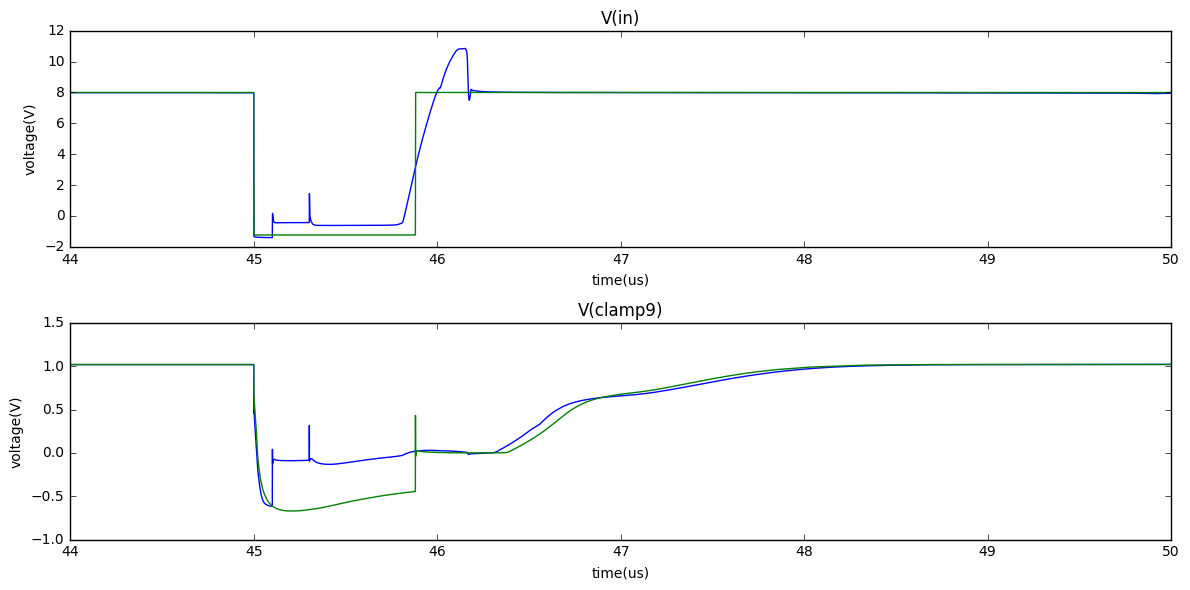

In [63]:
f, (ax1, ax2) = plt.subplots(2,1,figsize=(12,6))
#
ax1.plot(ref_time,ref_vclamp9)
ax1.plot(block2_time,block2_vclamp9)
ax1.set_title('V(in)')
ax1.set_xlim([44, 50])
#ax1.set_ylim([-4, 13])
ax1.set_xlabel('time(us)')
ax1.set_ylabel('voltage(V)')
#c
ax2.plot(ref_time,ref_v1p0)
ax2.plot(block2_time,block2_v1p0)
ax2.set_xlim([44, 50])
#ax2.set_ylim([-4, 13])
ax2.set_title('V(clamp9)')
ax2.set_xlabel('time(us)')
ax2.set_ylabel('voltage(V)')

#
plt.tight_layout()
plt.savefig("../../src/4/figures/simulation_comparison_block2.png", pad_inches=0.3)
plt.show()

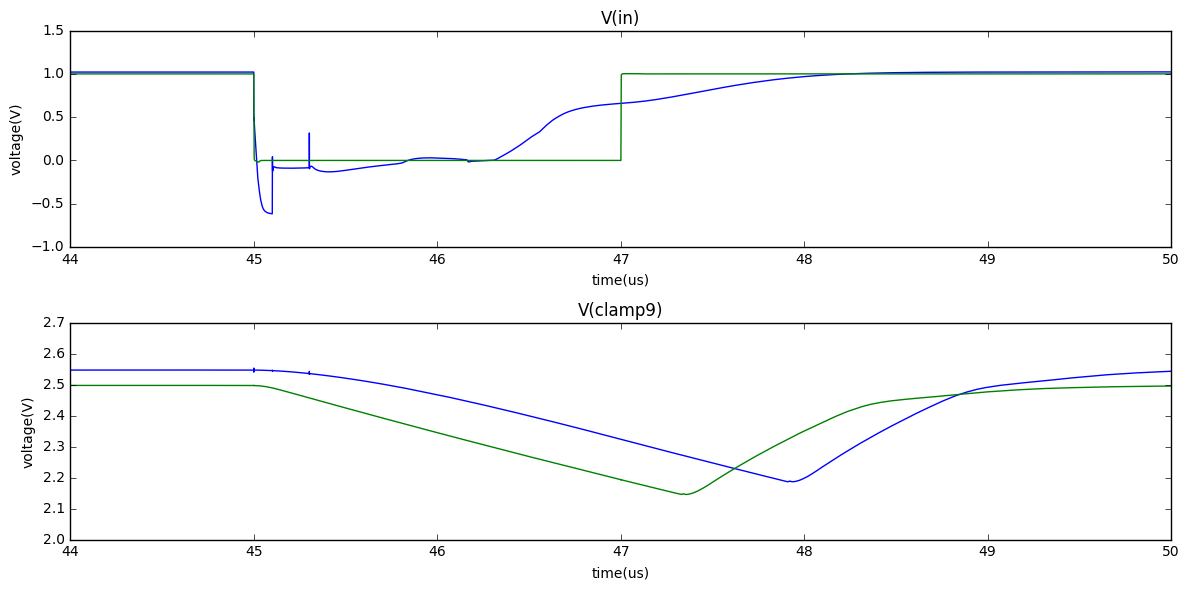

In [66]:
f, (ax1, ax2) = plt.subplots(2,1,figsize=(12,6))
#
ax1.plot(ref_time,ref_v1p0)
ax1.plot(block3_time,block3_v1p0)
ax1.set_title('V(in)')
ax1.set_xlim([44, 50])
#ax1.set_ylim([-4, 13])
ax1.set_xlabel('time(us)')
ax1.set_ylabel('voltage(V)')
#c
ax2.plot(ref_time,ref_v2p5)
ax2.plot(block3_time,block3_v2p5)
ax2.set_xlim([44, 50])
ax2.set_ylim([2.0, 2.7])
ax2.set_title('V(clamp9)')
ax2.set_xlabel('time(us)')
ax2.set_ylabel('voltage(V)')

#
plt.tight_layout()
plt.savefig("../../src/4/figures/simulation_comparison_block3.png", pad_inches=0.3)
plt.show()